In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
#there are 1338 rows and 7 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#there are no null values present

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
df['children'].value_counts(ascending=True)

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [17]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
#in these columns, 'children' columns is int64 and rest are object
#so we will convert the object data type to numerical


In [21]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [22]:
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)

In [24]:
df.replace({'region':{'northwest':0, 'northeast':1,'southeast':2,'southwest':3}},inplace=True)

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [26]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [27]:
cor=df.corr()

In [28]:
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


<AxesSubplot:>

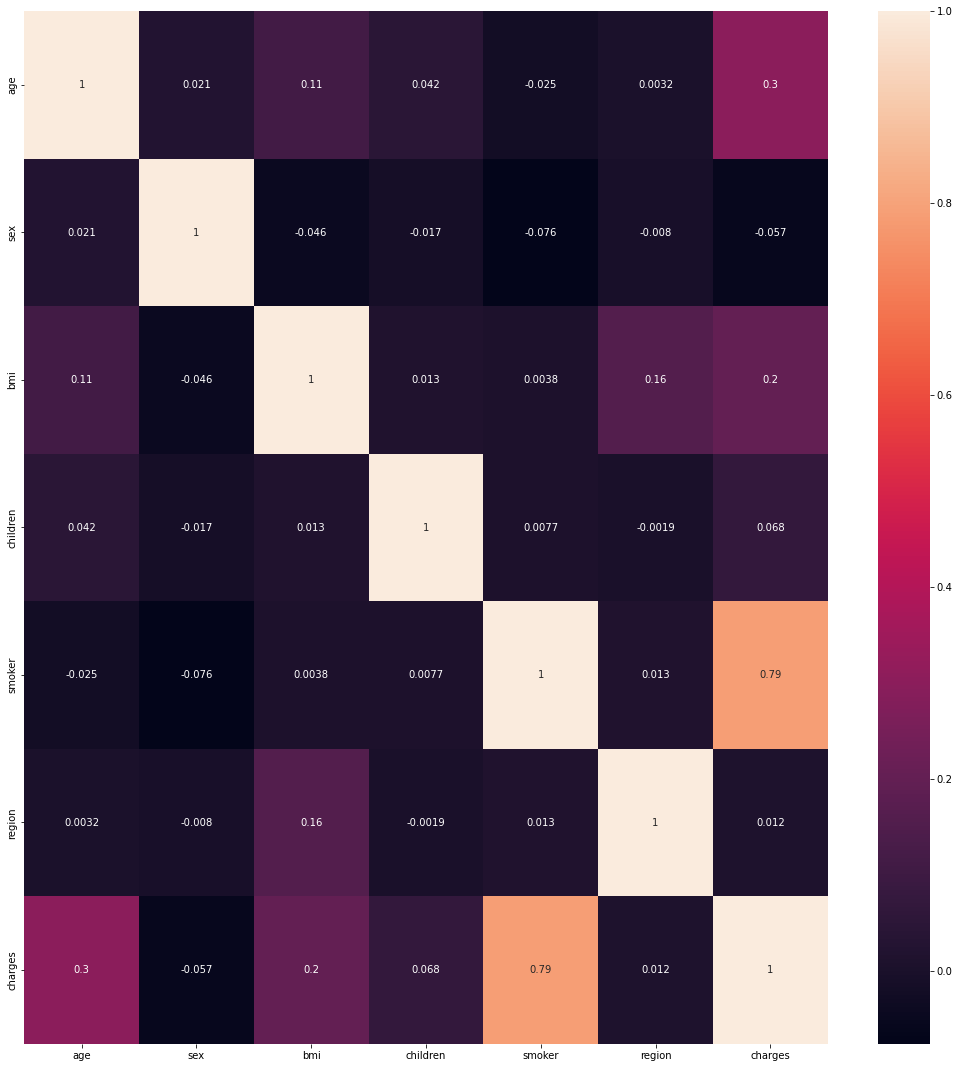

In [29]:
plt.figure(figsize=(18,19))
sns.heatmap(cor,annot=True)

In [30]:
# sex, children and region are very less correlated to the charges

In [31]:
#Now we will do data visualisation

Text(0.5, 1.0, 'AGE VS Charge')

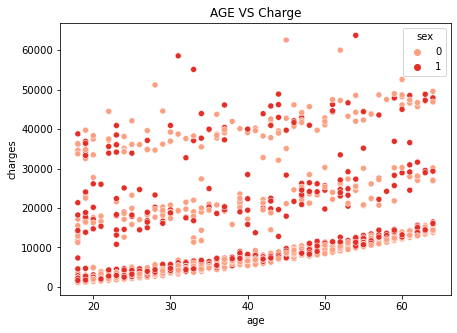

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age',y='charges',hue='sex',data=df,palette='Reds')
plt.title('AGE VS Charge')

In [45]:
#as the age increases, the charges for the insurance also increases

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

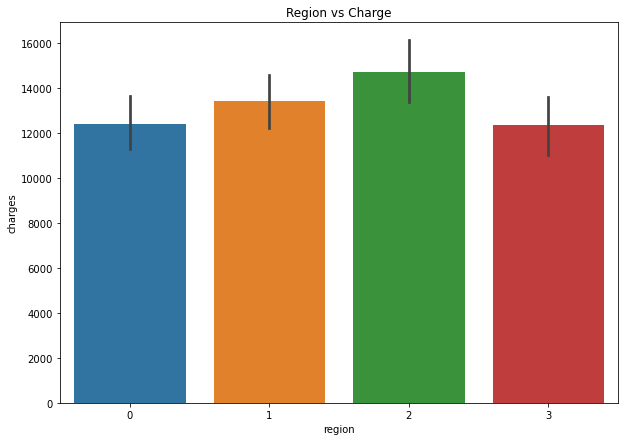

In [34]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df)


In [46]:
# as seen before, region has no such impact on the charges for the insurance

<AxesSubplot:title={'center':'bmi vs Charge'}, xlabel='bmi', ylabel='charges'>

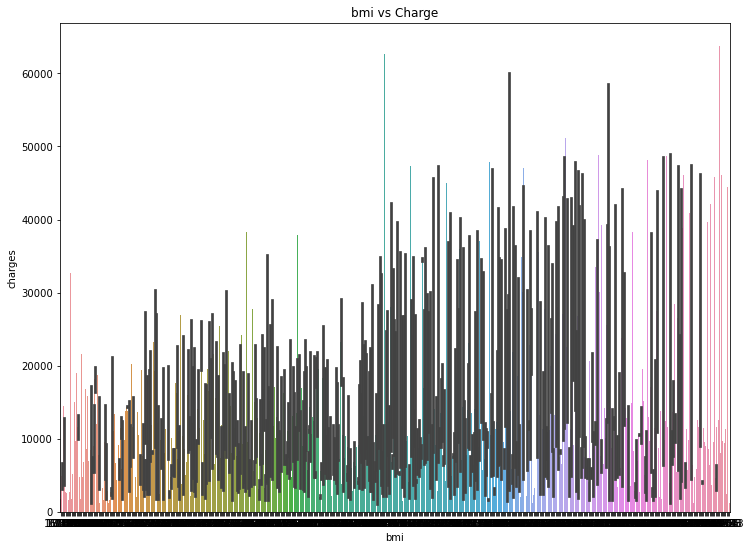

In [47]:
plt.figure(figsize=(12,9))
plt.title('bmi vs Charge')
sns.barplot(x='bmi',y='charges',data=df)

In [48]:
# bmi has somewhat impact on the charges for the insurance

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

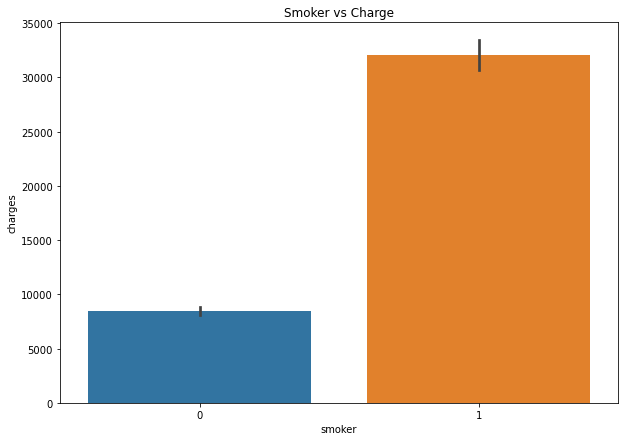

In [44]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df)

In [49]:
# person who smokes will pay a higher amount for the insurance

Text(0.5, 1.0, 'Sex vs Charges')

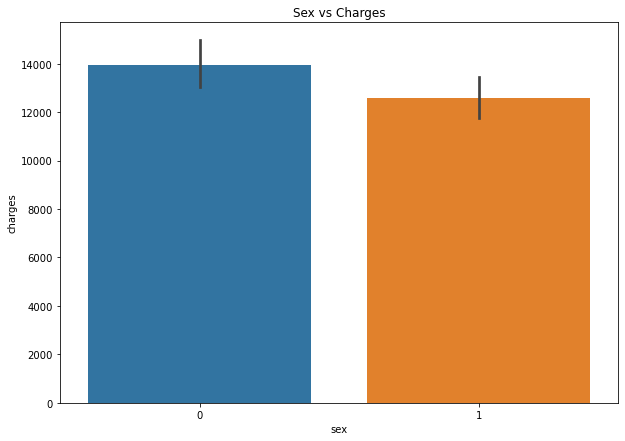

In [50]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex',y='charges',data=df)
plt.title('Sex vs Charges')


In [51]:
# sex has no such impact on the charges of the insurance

In [52]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

In [53]:
# checking the skewness

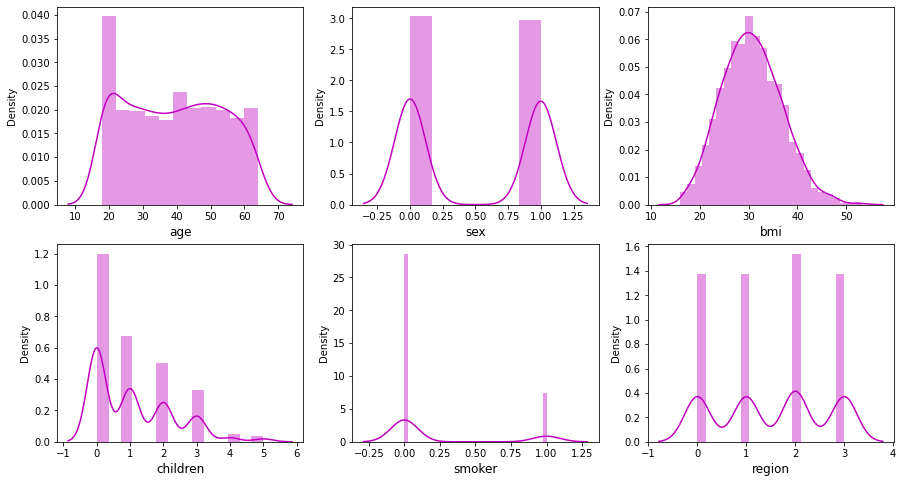

In [54]:
plt.figure(figsize=(15,8),facecolor='w')
pn=1
for c in df:
    if pn<=6:
        a=plt.subplot(2,3,pn)
        sns.distplot(df[c],color='m')
        plt.xlabel(c,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    pn+=1

In [56]:
#there is no such skewness present in the age and bmi column, other are categorical data, we do not remove skewness from categorical data

In [60]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [61]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [62]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=32)

In [66]:
# building the model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [70]:
!pip3 install xgboost



In [71]:
import xgboost as xgb

In [74]:
lr= LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [77]:
ypred = lr.predict(xtest)


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

In [81]:
print(mse)
print(r2)

31516426.053862263
0.7704605486908948


In [84]:
rmse= (np.sqrt(mse))

In [85]:
rmse

5613.9492386253605

In [86]:
# now we will predict the cost of the insurance


In [88]:
new_data=(37,0,25,1,0,2)

In [99]:
nd=pd.DataFrame({
    'age': [35],
    'sex': [0],
    'bmi': [25],
    'children': [1],
    'smoker': [1],
    'region_northeast': [1],
})

In [100]:
predicted_cost = lr.predict(nd)


In [101]:
predicted_cost

array([29058.1768536])

In [102]:
input_data=(30,1,30.90,3,1,2)


#changing input data to a numpy array
na=np.asarray(input_data)

#reshape the array
nreshaped=na.reshape(1,-1)

prediction=lr.predict(nreshaped)
print(prediction)
print("The Insurance cost is",prediction[0])

[30586.84821273]
The Insurance cost is 30586.848212733614
